### Import Libraries

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

### Read Data

In [129]:
data = pd.read_csv("wiki_movie.csv")

### Statistical Analysis

In [130]:
# Show first 5 rows of data
data.head(5)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [131]:
data.tail(5)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
34881,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,unknown,https://en.wikipedia.org/wiki/The_Water_Diviner,"The film begins in 1919, just after World War ..."
34882,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the..."
34883,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i..."
34884,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...
34885,2017,İstanbul Kırmızısı,Turkish,Ferzan Özpetek,"Halit Ergenç, Tuba Büyüküstün, Mehmet Günsür, ...",romantic,https://en.wikipedia.org/wiki/%C4%B0stanbul_K%...,The writer Orhan Şahin returns to İstanbul aft...


In [132]:
data.shape

(34886, 8)

In [134]:
data.describe(include='all')

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
count,34886.000000,34886,34886,34886,33464,34886,34886,34886
unique,NaN,32432,24,12593,32182,2265,34070,33869
top,NaN,Cinderella,American,Unknown,Tom and Jerry,unknown,https://en.wikipedia.org/wiki/Digimon_Adventur...,"(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chou..."
freq,NaN,8,17377,1124,80,6083,5,6
mean,1981.314252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,27.815174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1901.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1957.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1988.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
data.isnull().sum()

Release Year           0
Title                  0
Origin/Ethnicity       0
Director               0
Cast                1422
Genre                  0
Wiki Page              0
Plot                   0
dtype: int64

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [139]:
data[data.Cast.isnull()]

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...
...,...,...,...,...,...,...,...,...
34829,2009,Karanliktakiler,Turkish,Çağan Irmak,NaN,drama,https://en.wikipedia.org/wiki/Karanliktakiler,Egemen is an advertising agency clerk in his t...
34830,2009,Acı,Turkish,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Pain_(film),"Nesrin is a young girl fighting for freedom, w..."
34833,2009,The Watercolor,Turkish,Cihat Hazardagli,NaN,animation,https://en.wikipedia.org/wiki/The_Watercolor,Twelve-year-old Marco has an exclusive talent ...
34836,2009,Orada,Turkish,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Orada,When the matriarch of an Istanbul family dies ...


In [143]:
data.Cast.fillna("Unknown", inplace=True)
data[data.Title== 'Kansas Saloon Smashers']

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,Unknown,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."


**Brief description of data:**
The dataset contains descriptions of 34,886 movies from around the world. 

* Release Year: Year in which the movie was released
* Title: Movie title
* Origin/Ethnicity: Origin of movie (i.e. American, Bollywood, Tamil, etc.)
* Director: Director(s)
* Cast: Main actor and actresses
* Genre: Movie Genre(s)
* Wiki Page: URL of the Wikipedia page from which the plot description was scraped
* Plot: Long form description of movie plot

### Visualization

**The frequency of movies by Origin/Ethnicity:**

In [146]:
data['Origin/Ethnicity'].value_counts().sort_values()

Maldivian           2
Assamese            9
Egyptian           67
Turkish            70
Malaysian          70
Punjabi            84
Bangladeshi        87
Filipino          128
Marathi           141
Russian           232
Bengali           306
Kannada           444
Chinese           463
South_Korean      522
Australian        576
Canadian          723
Hong Kong         791
Malayalam        1095
Japanese         1188
Telugu           1311
Tamil            2599
Bollywood        2931
British          3670
American        17377
Name: Origin/Ethnicity, dtype: int64

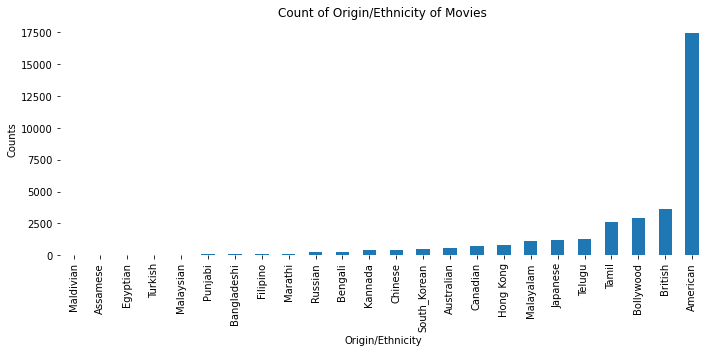

In [147]:
ax = data['Origin/Ethnicity'].value_counts().sort_values().plot.bar(figsize = (10, 5), fontsize = 10)
ax.set_title("Count of Origin/Ethnicity of Movies", fontsize=12)
plt.xlabel('Origin/Ethnicity', fontsize=10)
plt.ylabel('Counts', fontsize=10)
sns.despine(bottom=True, left=True)

Origin/Ethnicity of American movies are far more than any other movies.

**Count of movies per year**

In [151]:
data['Release Year'].value_counts().sort_index(ascending=True)

1901       4
1902       1
1903       2
1904       1
1905       2
        ... 
2013    1021
2014     929
2015     661
2016     721
2017     805
Name: Release Year, Length: 117, dtype: int64

<AxesSubplot:>

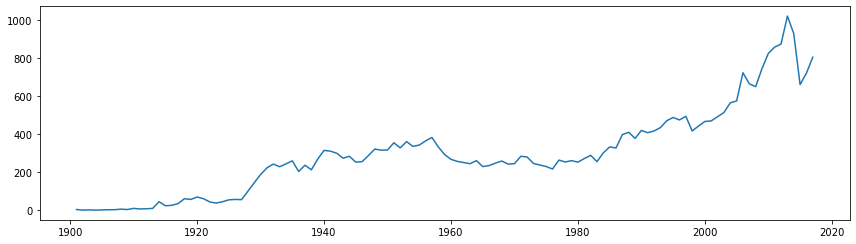

In [152]:
ax = data['Release Year'].value_counts().sort_index(ascending=True)
ax.plot.line(ax.index, ax)

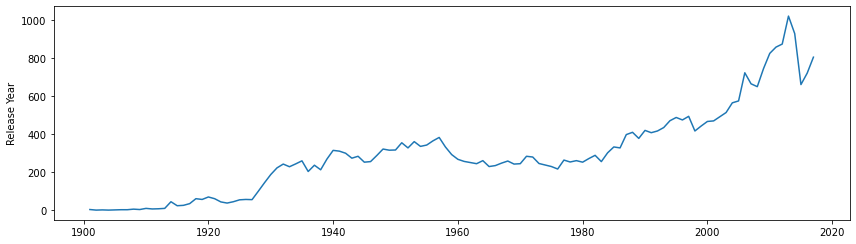

In [154]:
# draw lineplot
sns.lineplot(x=ax.index, y=ax, data=ax)
plt.show()

In [156]:
# ax = data['Release Year'].value_counts().sort_index(ascending=True)

# Sct = [go.Scatter(x = ax.index, y = ax.values, mode = 'lines', name = 'lines')]
# layout = go.Layout(title = 'Movies by year')
# fig = go.Figure(data = Sct, layout = layout)
# iplot(fig)

There are 1021 movies released in 2013 which is the highest number and suddenly there is a major drop in 2015 which is only 661.

**WordCloud**

WordCloud of Movies Plot

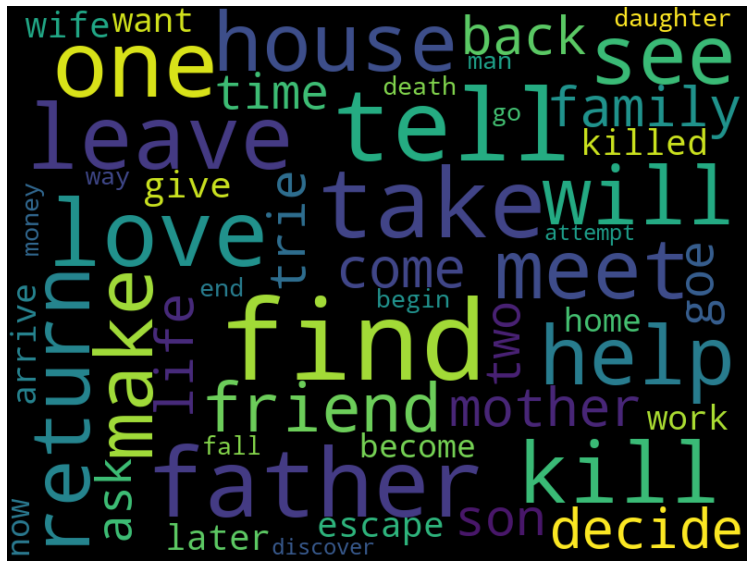

In [198]:
wordcloud = WordCloud(width = 800, height = 600, max_font_size = 120, max_words = 50).generate(" ".join(data.Plot))

plt.subplots(figsize=(18,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

There are some of the most frequent words used in all the movie plots like father, mother, tell, return, friend, find, help and many more.

**Top titles**

In [174]:
font_size = 10
fig_size = (8,8)
pal = "plasma"


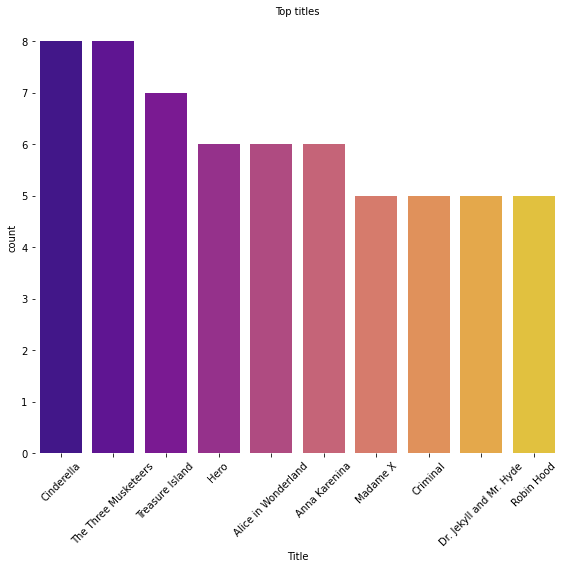

In [175]:
plt.figure(figsize=fig_size)
plt.title('Top titles',fontsize=font_size)
plt.xlabel('Title', fontsize=font_size)

sns.countplot(data.Title, 
              order=pd.value_counts(data.Title).iloc[:10].index,
              palette=sns.color_palette(pal, 10))

plt.xticks(size=font_size, rotation=45)
plt.yticks(size=font_size)
sns.despine(bottom=True, left=True)
plt.show()

**Most frequent Genres**

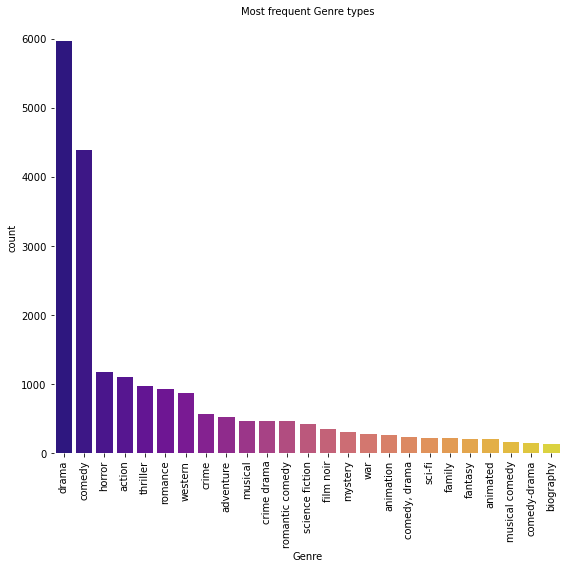

In [176]:
# Removing unknown genres
# Gen = data[data.Genre != "unknown"]

plt.figure(figsize=fig_size)
plt.title('Most frequent Genre types',fontsize=font_size)
plt.xlabel('Genre', fontsize=font_size)
plt.ylabel('Count', fontsize=font_size)

sns.countplot(Gen.Genre,
              order=pd.value_counts(Gen.Genre).iloc[:25].index,
              palette=sns.color_palette(pal, 25))

plt.xticks(size=font_size, rotation=90)
plt.yticks(size=font_size)
sns.despine(bottom=True, left=True)
plt.show()

Drama and Comedy are the top two frequent genres.

In [178]:
data[(data.Cast.notnull())]

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,Unknown,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,Unknown,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,Unknown,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,Unknown,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",Unknown,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...
...,...,...,...,...,...,...,...,...
34881,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,unknown,https://en.wikipedia.org/wiki/The_Water_Diviner,"The film begins in 1919, just after World War ..."
34882,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the..."
34883,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i..."
34884,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...


In [177]:
top_cast = data[(data.Cast.notnull()) & (data.Cast != " ")]
top_cast.shape, data.shape 

((34854, 8), (34886, 8))

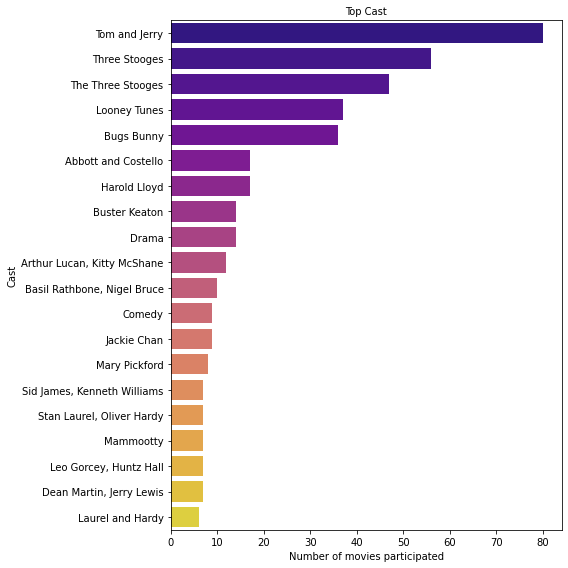

In [184]:
# Getting rid of null values and invisible characters (non-breaking spaces) 
top_cast = data[(data.Cast.notnull()) & (data.Cast != " ") & (data.Cast != "Unknown")] 
top_cast.set_index("Cast", inplace=True) 
# top_cast.rename(index={'Three Stooges':'The Three Stooges'}, inplace=True)

plt.figure(figsize=fig_size)
plt.title('Top Cast', fontsize=font_size)

sns.countplot(y = top_cast.index,
              order = pd.value_counts(top_cast.index)[:20].index,
              palette = sns.color_palette(pal, 20)) 

plt.ylabel('Cast',fontsize=font_size)
plt.xlabel('Number of movies participated',fontsize=font_size)
plt.xticks(size=font_size)
plt.yticks(size=font_size)
plt.show()

In [ ]:
# make Three Stooges and The Three Stooges, plot this chart again.

**Top directors**

In [ ]:
# pd.value_counts(Dir.Director)[:10]

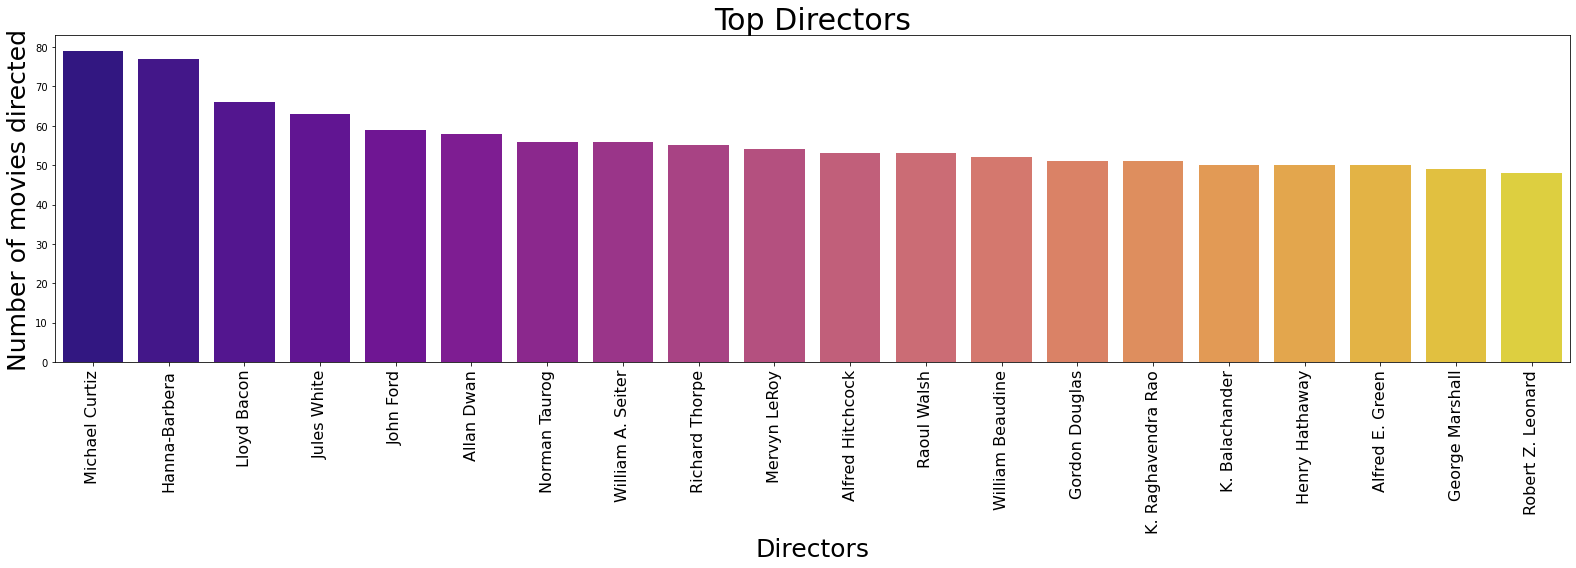

In [186]:
# Removing Unknown directors to get a clear picture of our data
Dir = data[data.Director != "Unknown"]

plt.figure(figsize=(22,8))
plt.title('Top Directors',fontsize=30)

sns.countplot(Dir.Director, 
              order=pd.value_counts(Dir.Director)[:20].index, 
              palette=sns.color_palette(pal, 20))

plt.xlabel('Directors',fontsize=25)
plt.ylabel('Number of movies directed',fontsize=25)
plt.xticks(size=16,rotation=90)
plt.show()

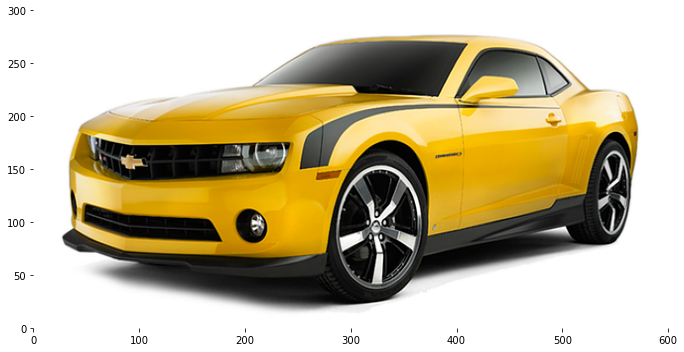

In [197]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [20, 5]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("car-967387_640.png")
fig, ax = plt.subplots()
im = ax.imshow(im, extent=[0, 600, 0, 300])
x = np.array(range(300))
# ax.plot(x, x, ls='dotted', linewidth=6, color='red')
sns.despine(bottom=True, left=True)
plt.show()